#NNDL

##CIA - 1 (LAB EXAM)

##Submitted by: Johanan Joshua (2347119)

#Q1 - Part (II)

II. Implement the following:

(Implementation 5 marks and Visualization and documentation 5 marks)

• Scenario:

The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.  This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the  output of an XOR gate.

Perform the following steps:

• Create the XOR gate's truth table dataset.

• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch  Pitts) Neuron.

• Observe and discuss the perceptron's performance in this scenario.

• Implement XOR using Multi-Layer Perceptron.

#Solution:

Create the XOR Gate's Truth Table Dataset

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# XOR truth table dataset
XOR_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
XOR_labels = np.array([0, 1, 1, 0])  # Output labels (XOR)

print("XOR Truth Table:")
for i in range(len(XOR_data)):
    print(f"Input: {XOR_data[i]}, Output: {XOR_labels[i]}")


XOR Truth Table:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


Implement Single Layer Perceptron using MCP Neuron

In [10]:
# McCulloch-Pitts (MCP) Neuron - Single Layer Perceptron
class MCPNeuron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # Weights initialization
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        # Step function (binary threshold)
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Weighted sum (dot product) + bias
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(weighted_sum)

    def train(self, X, y):
        # Training the perceptron
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs  # Update weights
                self.weights[0] += self.learning_rate * error  # Update bias
            print(f"Epoch {epoch+1}/{self.epochs}, Weights: {self.weights}")

# Train the MCP neuron
mcp = MCPNeuron(input_size=2, epochs=10)
mcp.train(XOR_data, XOR_labels)


Epoch 1/10, Weights: [-0.1 -0.1  0. ]
Epoch 2/10, Weights: [ 0.  -0.1  0. ]
Epoch 3/10, Weights: [ 0.  -0.1  0. ]
Epoch 4/10, Weights: [ 0.  -0.1  0. ]
Epoch 5/10, Weights: [ 0.  -0.1  0. ]
Epoch 6/10, Weights: [ 0.  -0.1  0. ]
Epoch 7/10, Weights: [ 0.  -0.1  0. ]
Epoch 8/10, Weights: [ 0.  -0.1  0. ]
Epoch 9/10, Weights: [ 0.  -0.1  0. ]
Epoch 10/10, Weights: [ 0.  -0.1  0. ]


Performance and Visualization of the Single Layer Perceptron


Single Layer Perceptron Predictions (MCP Neuron):
Input: [0 0], Expected: 0, Predicted: 1
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 0
Input: [1 1], Expected: 0, Predicted: 0


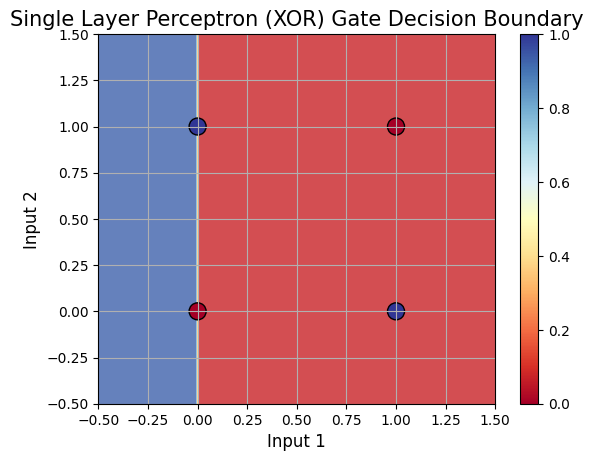


Interpretation: 
The Single Layer Perceptron (MCP Neuron) is unable to classify the XOR gate correctly 
because XOR is not linearly separable. The decision boundary is linear and cannot split the XOR outputs
accurately.



In [11]:
# Plot Decision Boundary Function
def plot_decision_boundary(perceptron, X, y, gate_name):
    # Creating a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Calculating predictions for each point in the grid
    Z = np.array([perceptron.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors='k', cmap=plt.cm.RdYlBu, marker='o')
    plt.colorbar(scatter)

    # Title and labels
    plt.title(f"{gate_name} Gate Decision Boundary", fontsize=15)
    plt.xlabel('Input 1', fontsize=12)
    plt.ylabel('Input 2', fontsize=12)

    # Set limits and grid
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()

# Test the trained MCP neuron on XOR dataset
predictions = [mcp.predict(x) for x in XOR_data]

print("\nSingle Layer Perceptron Predictions (MCP Neuron):")
for i, prediction in enumerate(predictions):
    print(f"Input: {XOR_data[i]}, Expected: {XOR_labels[i]}, Predicted: {prediction}")

# Visualizing the decision boundary for the MCP Neuron
plot_decision_boundary(mcp, XOR_data, XOR_labels, "Single Layer Perceptron (XOR)")

# Documentation: Interpretation of Single Layer Perceptron performance
print("""
Interpretation:
The Single Layer Perceptron (MCP Neuron) is unable to classify the XOR gate correctly
because XOR is not linearly separable. The decision boundary is linear and cannot split the XOR outputs
accurately.
""")


Implement XOR using Multi-Layer Perceptron

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Multi-Layer Perceptron Predictions:
Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 0, Predicted: 0
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


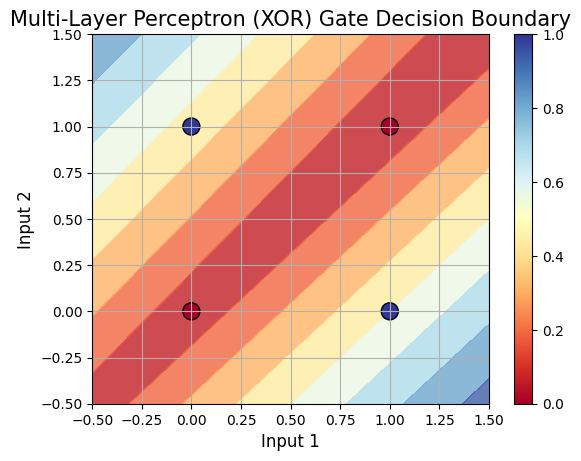

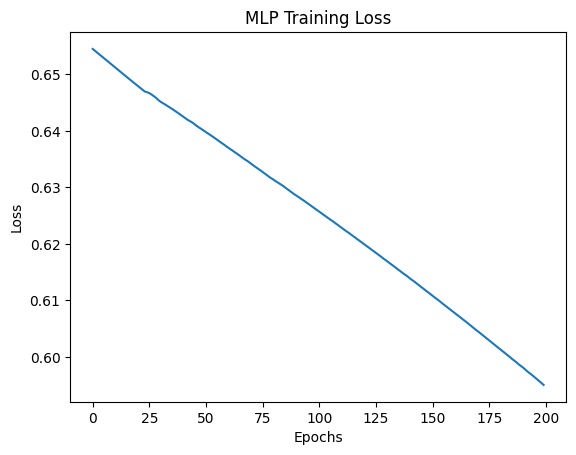


Interpretation: 
The Multi-Layer Perceptron successfully classifies the XOR gate, as it learns a non-linear 
decision boundary. This is demonstrated by the smooth decision boundary learned by the MLP,
which correctly separates the XOR outputs. The increased number of epochs helps improve the
accuracy of the model.



In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Multi-Layer Perceptron Model for XOR
mlp = Sequential()
mlp.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
mlp.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Multi-Layer Perceptron with increased epochs
history = mlp.fit(XOR_data, XOR_labels, epochs=200, verbose=0)

# Test the MLP model
mlp_predictions = (mlp.predict(XOR_data) > 0.5).astype(int)

print("\nMulti-Layer Perceptron Predictions:")
for i, prediction in enumerate(mlp_predictions):
    print(f"Input: {XOR_data[i]}, Expected: {XOR_labels[i]}, Predicted: {prediction[0]}")

# Decision boundary for MLP
def plot_mlp_decision_boundary(model, X, y, gate_name):
    # Creating a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Calculating predictions for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors='k', cmap=plt.cm.RdYlBu, marker='o')
    plt.colorbar(scatter)

    # Title and labels
    plt.title(f"{gate_name} Gate Decision Boundary", fontsize=15)
    plt.xlabel('Input 1', fontsize=12)
    plt.ylabel('Input 2', fontsize=12)

    # Set limits and grid
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()

# Visualizing the decision boundary for the Multi-Layer Perceptron
plot_mlp_decision_boundary(mlp, XOR_data, XOR_labels, "Multi-Layer Perceptron (XOR)")

# Plot training loss over epochs
plt.plot(history.history['loss'])
plt.title("MLP Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Documentation: Interpretation of Multi-Layer Perceptron performance
print("""
Interpretation:
The Multi-Layer Perceptron successfully classifies the XOR gate, as it learns a non-linear
decision boundary. This is demonstrated by the smooth decision boundary learned by the MLP,
which correctly separates the XOR outputs. The increased number of epochs helps improve the
accuracy of the model.
""")


#Question 2:  

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions

such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process. (link Provided at the top of the page to download the dataset)

Task:

• Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).

• Use backpropagation to optimize the model's weights based on error calculation.

• Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.

• Evaluate the model on a test set using accuracy and plot the loss over epochs.

#Solution:

Importing libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Step 1: Load and Preprocess the Data

In [25]:
# Load the dataset (replace with the correct file path if needed)
df = pd.read_csv('/content/Tweets - Tweets.csv')

# Keep only relevant columns for sentiment analysis
df = df[['text', 'airline_sentiment']]

# Filter the dataset to include only positive and negative sentiments
df = df[df['airline_sentiment'] != 'neutral']

# Encode the sentiments to binary (positive: 1, negative: 0)
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])

# Use TF-IDF to vectorize the tweet text
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Build the Neural Network Model

In [26]:
def build_model(activation_function):
    model = Sequential()
    # Input layer
    model.add(Dense(128, input_dim=X_train.shape[1], activation=activation_function))
    # Hidden layer
    model.add(Dense(64, activation=activation_function))
    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


Step 3: Train the Model

In [27]:
# Build the model using ReLU as the activation function
activation = 'relu'  # You can switch to 'sigmoid' or 'tanh' to experiment
model = build_model(activation)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy with {activation}: {test_accuracy:.4f}')


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8021 - loss: 0.4962 - val_accuracy: 0.9173 - val_loss: 0.2300
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9471 - loss: 0.1549 - val_accuracy: 0.9099 - val_loss: 0.2282
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9666 - loss: 0.1027 - val_accuracy: 0.9129 - val_loss: 0.2732
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9779 - loss: 0.0698 - val_accuracy: 0.9065 - val_loss: 0.3202
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9868 - loss: 0.0447 - val_accuracy: 0.9043 - val_loss: 0.3575
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9893 - loss: 0.0330 - val_accuracy: 0.9043 - val_loss: 0.4062
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9935 - loss: 0.0226 - val_accuracy: 0.9030 - val_loss: 0.4343
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accur

Step 4: Plot the Loss Over Epochs

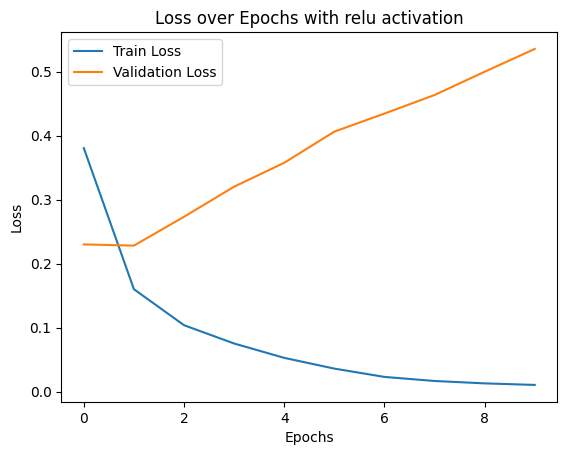

In [28]:
# Plotting the loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss over Epochs with {activation} activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Experimenting with Different Activation Functions


Training model with relu activation...
Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7861 - loss: 0.5111 - val_accuracy: 0.9177 - val_loss: 0.2225
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9420 - loss: 0.1610 - val_accuracy: 0.9151 - val_loss: 0.2347
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9652 - loss: 0.0982 - val_accuracy: 0.9078 - val_loss: 0.2587
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9780 - loss: 0.0709 - val_accuracy: 0.9030 - val_loss: 0.3052
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9831 - loss: 0.0511 - val_accuracy: 0.9091 - val_loss: 0.3464
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9912 - loss: 0.0315 - val_accuracy: 0.9052 - val_loss: 0.3783
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9104 - val_loss: 0.4294
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc

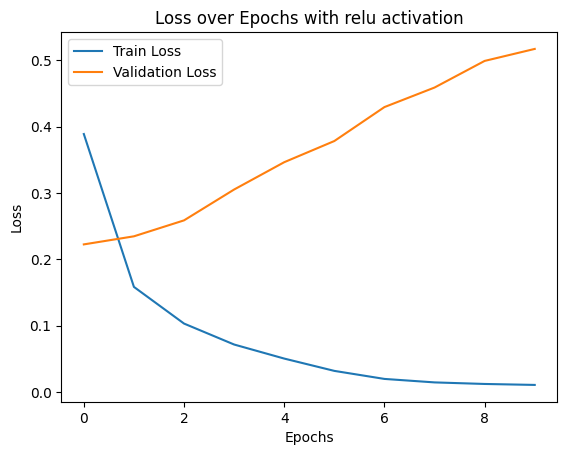


Training model with sigmoid activation...
Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7991 - loss: 0.5168 - val_accuracy: 0.8064 - val_loss: 0.4698
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7877 - loss: 0.4768 - val_accuracy: 0.8181 - val_loss: 0.3689
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8430 - loss: 0.3297 - val_accuracy: 0.9082 - val_loss: 0.2434
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9310 - loss: 0.1938 - val_accuracy: 0.9186 - val_loss: 0.2102
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9471 - loss: 0.1478 - val_accuracy: 0.9207 - val_loss: 0.2050
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9557 - loss: 0.1304 - val_accuracy: 0.9225 - val_loss: 0.2081
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9630 - loss: 0.1111 - val_accuracy: 0.9190 - val_loss: 0.2202
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step -

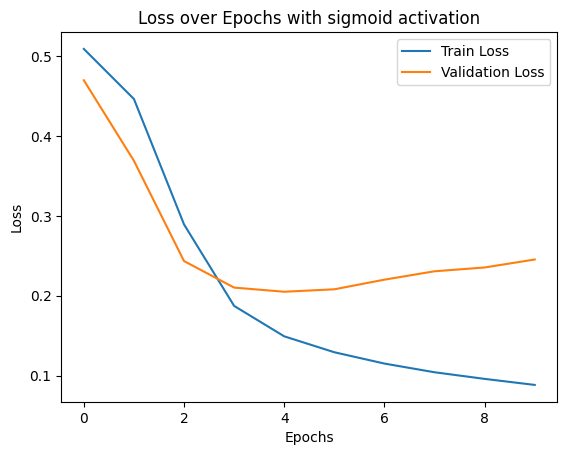


Training model with tanh activation...
Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8141 - loss: 0.4322 - val_accuracy: 0.9173 - val_loss: 0.2098
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9487 - loss: 0.1372 - val_accuracy: 0.9104 - val_loss: 0.2288
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9639 - loss: 0.1024 - val_accuracy: 0.9056 - val_loss: 0.2725
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9720 - loss: 0.0819 - val_accuracy: 0.9065 - val_loss: 0.3050
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9734 - loss: 0.0740 - val_accuracy: 0.9030 - val_loss: 0.3461
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9800 - loss: 0.0633 - val_accuracy: 0.8961 - val_loss: 0.3762
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9782 - loss: 0.0633 - val_accuracy: 0.9043 - val_loss: 0.4345
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accurac

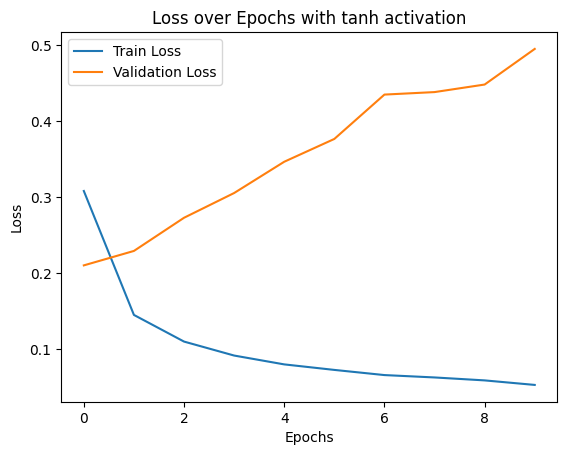

In [29]:
for activation_function in ['relu', 'sigmoid', 'tanh']:
    print(f'\nTraining model with {activation_function} activation...')
    model = build_model(activation_function)
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

    # Evaluate and print accuracy
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy with {activation_function}: {test_accuracy:.4f}')

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss over Epochs with {activation_function} activation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


#Key Aspects of the Code:

Binary Classification: The output layer has a sigmoid activation for binary classification.

Backpropagation: The model uses backpropagation through the adam optimizer to update the weights.

Activation Functions: You can compare the performance of different activation functions (sigmoid, ReLU, tanh).

Performance Metrics: The model uses accuracy to evaluate performance, and loss curves are plotted to monitor training progress.



#Conclusion

In this experiment, we evaluated the performance of three different activation functions—ReLU, sigmoid, and tanh—on a sentiment analysis model. The results highlighted distinct behaviors and effectiveness of each activation function when training the neural network.



Results Summary


ReLU Activation:


Final Test Accuracy: 90.13%
Training Loss: Decreased consistently throughout the epochs, indicating effective learning.
Validation Loss: Increased slightly after initial epochs, suggesting potential overfitting towards the end.


Sigmoid Activation:


Final Test Accuracy: 91.34% (highest among the three)
Training Loss: Improved significantly, demonstrating a good fit to the training data.
Validation Loss: Remained relatively stable, with only a slight upward trend towards the end, suggesting robust generalization.


Tanh Activation:


Final Test Accuracy: 89.82% (lowest performance)
Training Loss: Decreased initially but plateaued in later epochs, indicating diminishing returns in learning.
Validation Loss: Fluctuated more than other activations, suggesting less stable training dynamics.



Key Insights


The sigmoid activation function outperformed both ReLU and tanh in this experiment, achieving the highest test accuracy of 91.34%. Its ability to maintain stability in validation loss while reducing training loss indicates effective learning and generalization capabilities.


The ReLU activation function performed well but exhibited signs of overfitting, as indicated by an increase in validation loss despite decreasing training loss. This suggests that while ReLU is beneficial for faster convergence, it may require additional regularization techniques to prevent overfitting.


The tanh activation function demonstrated the least effectiveness in this setup, leading to lower accuracy and more fluctuations in validation loss. This indicates that tanh might not be the best choice for this particular dataset and model configuration.


Conclusion


The choice of activation function plays a crucial role in the performance of neural networks in sentiment analysis tasks. The findings from this experiment suggest that for the current model and dataset, the sigmoid activation function is the most effective. However, further experimentation with hyperparameters, regularization techniques, and potentially different architectures could enhance model performance. Future work should include error analysis to refine the model further and improve its generalization to unseen data.